#Preparing Data

In [49]:
# import necessary libraries here

import pandas as pd
import seaborn as sns

To take the Dataset to the state it was in the previous repository;

In [61]:
#import and wrangle Data

df = pd.read_csv("/content/drive/MyDrive/Project /nigeria_houses_data.csv")

#Subset Data:Detached Duplex in Lagos

mask_state = df["state"] == "Lagos"
mask_title = df["title"] == "Detached Duplex"
df_lagos= df[mask_state & mask_title]

#Removing outliers in price distribution

high = df["price"].quantile(.9)
mask_price = df["price"] < high

df_clean = df_lagos[mask_price]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


Now, to move forward with the cleaned Dataset comprising Detached Duplex in Lagos, Nigeria.

#Explore Data

In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10088 entries, 2 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       10088 non-null  float64
 1   bathrooms      10088 non-null  float64
 2   toilets        10088 non-null  float64
 3   parking_space  10088 non-null  float64
 4   title          10088 non-null  object 
 5   town           10088 non-null  object 
 6   state          10088 non-null  object 
 7   price          10088 non-null  float64
dtypes: float64(5), object(3)
memory usage: 709.3+ KB


Observations:

* There are 8 columns in our Dataset in total .

* The target vector is the "price" column.

* The remnants will form our feature matrix

Note: 

Not all the columns will be needed in creating our model, hence, the need for more exploration for the feature selection.

In [52]:
#Dealing with categorical values

#checking their cardinality 
print ("Cardinality for Town: ",df_clean["town"].nunique())
print ("Cardinality for State: ",df_clean["state"].nunique())
print ("Cardinality for Title: ",df_clean["title"].nunique())

Cardinality for Town:  33
Cardinality for State:  1
Cardinality for Title:  1


The "state" and "title" columns will be dropped due to low cardinality — A single value all through, it won't be of use in creating our model.

In [53]:
#Drop Columns with high and low cardinality category values 
   
df_clean.drop(columns=["title", "state"], inplace=True)

Dealing with numerical values:

To check for multicollinearities in our feature matrix;

In [54]:
corr= df_clean.select_dtypes("number").corr()
corr

,bedrooms,bathrooms,toilets,parking_space,price
bedrooms,1.000000,0.760340,0.315516,0.038783,0.258401
bathrooms,0.760340,1.000000,0.410562,0.067054,0.203732
toilets,0.315516,0.410562,1.000000,0.266922,0.256393
parking_space,0.038783,0.067054,0.266922,1.000000,0.165085
price,0.258401,0.203732,0.256393,0.165085,1.000000


To visualise the correlation using Heat map

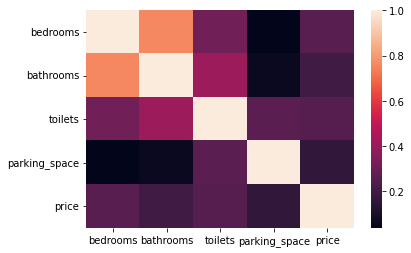

In [62]:
sns.heatmap(corr);

Observations:
* "Bedrooms" , "bathrooms" , and "toilets" are correlated with one another.

This ought not to be so, hence a need to withhold only one of them in our feature matrix.


The selection will be base on their correlation with the "price" column ( the target vector) .

In [56]:
# checking correlation with price

corr["price"].round(3)

bedrooms         0.258
bathrooms        0.204
toilets          0.256
parking_space    0.165
price            1.000
Name: price, dtype: float64

Of note, "bedrooms" has the highest correlation coefficient . Thus, it'll be withheld while others are dropped.

In [57]:
#Drop columns with multicollinearities
   
df_clean.drop(columns = ["bathrooms", "toilets"], inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [58]:

print("The shape of the Dataset: ", df_clean.shape)
print ('''
————————————————————————————————————————
''')
df_clean.info()

The shape of the Dataset:  (10088, 4)

————————————————————————————————————————

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10088 entries, 2 to 24325
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       10088 non-null  float64
 1   parking_space  10088 non-null  float64
 2   town           10088 non-null  object 
 3   price          10088 non-null  float64
dtypes: float64(3), object(1)
memory usage: 394.1+ KB


Awesome! We are now left with 4 columns, where "price" is the target vector while the remnants will form the feature matrix in building our model.

* bedrooms
* parking_space
* town

* price (target vector)

#Conclusion 

With the operations performed above, we've been able to explore our cleaned Dataset to select necessary features that'll improve our model, and dropped others based on statistical facts.

... be on the look out for my next repository and discover how I progressed in the project by defining a wrangle function, that will perform all the data wrangling done thus far in this project, and how I built the model.